# Парное выравнивание

# Порядок сдачи домашнего

Вам требуется создать гит репозиторий куда вы будете складывать все ваши домашние. Под каждое домашнее вы создаете отдельную ветку куда вносите все изменения в рамках домашнего. Как только домашнее готово - создаете пулл реквест (обратите внимание что в пулл реквесте должны быть отражены все изменения в рамках домашнего). Ревьювера назначаете из таблицы - https://docs.google.com/spreadsheets/d/1vK6IgEqaqXniUJAQOOspiL_tx3EYTSXW1cUrMHAZFr8/edit?gid=0#gid=0
Перед сдачей проверьте код, напишите тесты. Не забудьте про PEP8, например, с помощью flake8. Задание нужно делать в jupyter notebook.

**Дедлайн - 30 сентября 10:00**

# Введение

**Выравнивание последовательностей** — фундаментальный инструмент в биоинформатике, позволяющий сравнивать биологические последовательности (ДНК, РНК, белки) для выявления сходства, которое может указывать на функциональные, структурные или эволюционные связи между ними.

**Парное выравнивание** подразумевает сравнение двух последовательностей для определения наилучшего соответствия между их элементами (нуклеотидами или аминокислотами). Существует два основных типа парного выравнивания:

- **Глобальное выравнивание**: направлено на выравнивание всей длины двух последовательностей, максимально учитывая все элементы.
- **Локальное выравнивание**: нацелено на поиск наилучшего соответствующего участка внутри двух последовательностей.

В данном домашнем задании мы с вами сконцентрируемся на **глобальном выравнивании**.

### Пример парного выравнивания

Рассмотрим две нуклеотидные последовательности:

```
Последовательность 1 (Seq1): A G C T A C G A
Последовательность 2 (Seq2): G C T A G A
```

**Глобальное выравнивание** (учитывает всю длину последовательностей):

```
Seq1: A G C T A C G A
Seq2: - G C T A - G A
```

### Значение выравнивания последовательностей

- **Эволюционные связи**: Сходство между последовательностями может указывать на общих предков.
- **Функциональные домены**: Выравнивание помогает идентифицировать консервативные участки, важные для функции белка или нуклеиновой кислоты.
- **Геномные исследования**: Используется для аннотации генов, предсказания структур и понимания генетических вариаций.

## Алгоритм выравнивания

- Для автоматизации процесса выравнивания используется **Алгоритм Нидлмана-Вунша**. Он предназначен для глобального выравнивания и использует динамическое программирование для нахождения оптимального выравнивания по всей длине последовательностей. 
- Для оценки сходства при выравнивании белковых последовательностей используется матрица **BLOSUM** (Blocks Substitution Matrix). Матрицы BLOSUM создаются на основе статистического анализа реальных белковых множественных выравниваний последовательностей.

### Пример множественного выравнивания (для построения матрциы BLOSUM)

Рассмотрим нуклеотидные последовательности:

```
Последовательность 1 (Seq1): A G C T A C G T G T C G C T G A A T C T A T G A C T
Последовательность 2 (Seq2): G C T A G A G C A A G G C A A C T G C A T C T
Последовательность 3 (Seq3): A C T G C A C C C A T G A A C C T C G C G C T
Последовательность 4 (Seq4): A C T G C A C C C A T G A A C C T C T C G C T
Последовательность 5 (Seq5): A C T G C A C C C A T G A A C C T C T C G C T
Последовательность 6 (Seq6): A C T G C A C C C A T G A A C C T C T C A C T
Последовательность 7 (Seq7): A C T G C A C C C A T G A A C C T C T C A C T
```

**Множественное выравнивание**:

```
Seq1: A G C T A C G T G T C G C T G A A T C T A T G A C T
Seq2: - G C T A - G A G C A - A G G C A A C T G C A T C T
Seq3: A - C T G - C A C C C - A T G A A C C T C G C G C T
Seq4: A - C T G - C A C C C - A T G A A C C T C T C G C T
Seq5: A - C T G - C A C C C - A T G A A C C T C T C G C T
Seq6: A - C T G - C A C C C - A T G A A C C T C T C A C T
Seq7: A - C T G - C A C C C - A T G A A C C T C T C A C T
```

Перед тем как приступать к реализации парного выравнивания давайте научимся считать матрицу BLOSUM.

# Матрица BLOSUM

## Подсчет частот пар нуклеотидов

### Шаг 1.1: Генерация пар нуклеотидов

Напишите функцию `generate_pairs(alignments)`, которая проходит по всем позициям выравнивания и генерирует все возможные пары нуклеотидов в этой позиции.

**Пример**:

Рассмотрим на примере множественного выравнивания выше:

```
generate_pairs(["A", "A", "G"])
[('A', 'A'), ('A', 'G'), ('A', 'G')]

generate_pairs(["T", "T", "T"])
[('T', 'T'), ('T', 'T'), ('T', 'T')]

generate_pairs(["G", "G", "-"])
[('G', 'G'), ('G', '-'), ('G', '-')]

len(generate_pairs(['A', 'T', 'G', 'G', 'G', 'A', 'A']))
21
```

In [1]:
alignments = ["AGCTACGTGTCGCTGAATCTATGACT", 
              "-GCTA-GAGCA-AGGCAACTGCATCT", 
              "A-CTG-CACCC-ATGAACCTCGCGCT",
              "A-CTG-CACCC-ATGAACCTCTCGCT",
              "A-CTG-CACCC-ATGAACCTCTCGCT",
              "A-CTG-CACCC-ATGAACCTCTCACT",
              "A-CTG-CACCC-ATGAACCTCTCACT"
             ]

In [3]:
def generate_pairs(alignments):
    w_pairs_for_all = []
    for n in alignments:
        w_list = []
        w_pairs = []
        for w in n:
            w_list += w
        for i in range(len(w_list)):
            for j in range(i + 1, len(w_list)):
                w_pairs.append((w_list[i], w_list[j]))
        w_pairs_for_all += w_pairs
    return(w_pairs_for_all)

generate_pairs(alignments)

[('A', 'G'),
 ('A', 'C'),
 ('A', 'T'),
 ('A', 'A'),
 ('A', 'C'),
 ('A', 'G'),
 ('A', 'T'),
 ('A', 'G'),
 ('A', 'T'),
 ('A', 'C'),
 ('A', 'G'),
 ('A', 'C'),
 ('A', 'T'),
 ('A', 'G'),
 ('A', 'A'),
 ('A', 'A'),
 ('A', 'T'),
 ('A', 'C'),
 ('A', 'T'),
 ('A', 'A'),
 ('A', 'T'),
 ('A', 'G'),
 ('A', 'A'),
 ('A', 'C'),
 ('A', 'T'),
 ('G', 'C'),
 ('G', 'T'),
 ('G', 'A'),
 ('G', 'C'),
 ('G', 'G'),
 ('G', 'T'),
 ('G', 'G'),
 ('G', 'T'),
 ('G', 'C'),
 ('G', 'G'),
 ('G', 'C'),
 ('G', 'T'),
 ('G', 'G'),
 ('G', 'A'),
 ('G', 'A'),
 ('G', 'T'),
 ('G', 'C'),
 ('G', 'T'),
 ('G', 'A'),
 ('G', 'T'),
 ('G', 'G'),
 ('G', 'A'),
 ('G', 'C'),
 ('G', 'T'),
 ('C', 'T'),
 ('C', 'A'),
 ('C', 'C'),
 ('C', 'G'),
 ('C', 'T'),
 ('C', 'G'),
 ('C', 'T'),
 ('C', 'C'),
 ('C', 'G'),
 ('C', 'C'),
 ('C', 'T'),
 ('C', 'G'),
 ('C', 'A'),
 ('C', 'A'),
 ('C', 'T'),
 ('C', 'C'),
 ('C', 'T'),
 ('C', 'A'),
 ('C', 'T'),
 ('C', 'G'),
 ('C', 'A'),
 ('C', 'C'),
 ('C', 'T'),
 ('T', 'A'),
 ('T', 'C'),
 ('T', 'G'),
 ('T', 'T'),
 ('T', 'G'),

### Шаг 1.2: Подсчет частот пар

Используйте полученные пары для подсчета частоты каждой пары нуклеотидов. Создайте словарь `pair_counts`, где ключом является кортеж из двух нуклеотидов, а значением — количество их совместных появлений. Пропуски в выравнивании нужно пропускать (если один из символ в выравнивании `'-'`)

**Подсказка**: Учитывайте, что матрица симметрична, поэтому пары `('A','G')` и `('G','A')` должны считаться одинаковыми.

**Пример**:

```
pair_counts = count_pairs(alignments)
pair_counts
{('A', 'A'): 38, ('G', 'G'): 16, ('C', 'C'): 57, ('T', 'T'): 39, ('A', 'G'): 11,
 ('C', 'G'): 19, ('A', 'T'): 8, ('C', 'T'): 10, ('A', 'C'): 21, ('G', 'T'): 8}}
```

In [9]:
def unic_elements(alignments):
    unic_elements_in_alignments = []
    for n in alignments:
        unic_elements_in_alignments += (list(set(n)))
    unic_elements_in_alignments = list(set(unic_elements_in_alignments))
    unic_elements_in_alignments.remove("-")
    return unic_elements_in_alignments

def count_pairs(alignments):
    pair_counts = {}
    generated_pairs = generate_pairs(alignments)
    unic_elements_in_alignments = unic_elements(alignments)
    unic_pairs = []
    for i in range(len(unic_elements_in_alignments)):
        for j in range(i, len(unic_elements_in_alignments)):
            unic_pairs.append((unic_elements_in_alignments[i], unic_elements_in_alignments[j]))
    pair_counts = {pair: 0 for pair in unic_pairs}
    for pair in pair_counts:
            for i in generated_pairs:
                if pair == i or pair == (i[1], i[0]):
                    pair_counts[pair] += 1
    return pair_counts
              
count_pairs(alignments)

{('C', 'C'): 255,
 ('C', 'A'): 348,
 ('C', 'G'): 212,
 ('C', 'T'): 312,
 ('A', 'A'): 96,
 ('A', 'G'): 152,
 ('A', 'T'): 206,
 ('G', 'G'): 44,
 ('G', 'T'): 138,
 ('T', 'T'): 80}

In [4]:
# from collections import defaultdict
# pair_counts = count_pairs(alignments)
# result = defaultdict(int)
# for d in pair_counts:
#     for k, v in d.items():
#         result[k] += v
# pair_counts = dict(result)

## Вычисление ожидаемых частот

Реализуйте функцию `calculate_frequencies`, которая будет вычислять частоту нуклеотида по множественному выравниванию

**Пример**:

```
freqs = calculate_frequencies(alignments)
print("Частоты:")
for x, freq in freqs.items():
    print(f"{x}: {freq:.4f}")
    
Частоты:
A: 0.2439
G: 0.1585
C: 0.3780
T: 0.2195
```

In [10]:
def calculate_frequencies(alignments):
    freqs_dic = {}
    unic_elements_in_alignments = unic_elements(alignments)
    alignments_row = []
    for i in unic_elements_in_alignments:
        for m in i:
            freqs_dic[m] = 0
    for i in alignments:
        for m in i:
            alignments_row += m
    for unic_element in freqs_dic:
        for i in alignments_row:
            for m in i:
                if unic_element == m:
                    freqs_dic[unic_element] += 1
    sum_elements = sum(freqs_dic.values())
    for i in freqs_dic:
        freqs_dic[i] /= sum_elements
    return freqs_dic

calculate_frequencies(alignments)

{'C': 0.3780487804878049,
 'A': 0.24390243902439024,
 'G': 0.15853658536585366,
 'T': 0.21951219512195122}

##  Расчет логарифмических коэффициентов

- Для каждой пары нуклеотидов `(x, y)` вычислите логарифмический коэффициент замены по формуле:


$$S(x, y) = scale * \log_2 \left( \frac{observed\_freq[x, y]}{expected\_freq[x, y]} \right)$$

- Здесь `observed_freq` — наблюдаемая частота пары из `pair_counts` деленное на общее количество пар, а `expected_freq` — ожидаемая частота, которую можно вычислить как `expected_freq[x, y] = freqs[x] * freqs[y]`

- Для удобства представления округлите значения `S(x, y)` до целых чисел, умножив на масштабный фактор (например, 3).

**Пример:**

```python
scores = calculate_scores(pair_counts, freqs)
scores
{('A', 'A'): 4, ('G', 'G'): 4, ('C', 'C'): 2, ('T', 'T'): 6, ('A', 'G'): 1,
 ('C', 'G'): 1, ('A', 'T'): -1, ('C', 'T'): -2, ('A', 'C'): 0, ('G', 'T'): 0}
```


In [37]:
import math
def calculate_scores(pair_counts, freqs, scale=3):
    observed_freq = pair_counts.copy()
    for pairs in observed_freq:
        observed_freq[pairs] = observed_freq[pairs] / len(pairs_list)
        # observed_freq[pairs] /= sum(observed_freq.values())
    expected_freq = pair_counts.copy()
    for key in expected_freq:
        if key[0] in freqs and key[1] in freqs:
            expected_freq[key] = freqs[key[0]] * freqs[key[1]]
    score = pair_counts.copy()
    for m in score:
        score[m] = scale * math.log((observed_freq[m]/expected_freq[m]), 2)
        score[m] = round(score[m])
    return score
pairs_list = generate_pairs(alignments)
pair_counts = count_pairs(alignments)
freqs = calculate_frequencies(alignments)
calculate_scores(pair_counts, freqs, scale=3)

{('C', 'C'): -1,
 ('C', 'A'): 2,
 ('C', 'G'): 2,
 ('C', 'T'): 2,
 ('A', 'A'): -1,
 ('A', 'G'): 2,
 ('A', 'T'): 2,
 ('G', 'G'): -1,
 ('G', 'T'): 2,
 ('T', 'T'): -1}


## Составление матрицы BLOSUM

### Шаг 4.1: Заполнение матрицы

- Реализуйте функцию `create_blosum_matrix`, для создания BLOSUM матрицы.
- Используйте рассчитанные ранее логарифмические коэффициенты `scores` для заполнения матрицы.
- Учитывайте, что матрица симметрична: `S(x, y) = S(y, x)`.

**Пример:**

```python
blosum_matrix = create_blosum_matrix(scores, nucleotides)
blosum_matrix
{'A': {'A': 4, 'G': 1, 'C': 0, 'T': -1},
 'G': {'A': 1, 'G': 4, 'C': 1, 'T': 0},
 'C': {'A': 0, 'G': 1, 'C': 2, 'T': -2},
 'T': {'A': -1, 'G': 0, 'C': -2, 'T': 6}}
```


In [38]:
def create_blosum_matrix(scores, nucleotides):
    blosum_matrix = {nuc: {nuc2: 0 for nuc2 in nucleotides} for nuc in nucleotides}
    for pair, score in scores.items():
        nuc1, nuc2 = pair
        blosum_matrix[nuc1][nuc2] = score
        blosum_matrix[nuc2][nuc1] = score 
    return blosum_matrix

nucleotides = ['A', 'G', 'C', 'T']
scores = calculate_scores(pair_counts, freqs, scale=3)
create_blosum_matrix(scores, nucleotides)

{'A': {'A': -1, 'G': 2, 'C': 2, 'T': 2},
 'G': {'A': 2, 'G': -1, 'C': 2, 'T': 2},
 'C': {'A': 2, 'G': 2, 'C': -1, 'T': 2},
 'T': {'A': 2, 'G': 2, 'C': 2, 'T': -1}}

### Шаг 4.2: Вывод матрицы

- Выведите матрицу BLOSUM в удобочитаемом формате, например, как таблицу с заголовками.

**Пример:**

```python
print_blosum_matrix(blosum_matrix, nucleotides)
    A   G   C   T
A   4   1   0  -1
G   1   4   1   0
C   0   1   2  -2
T  -1   0  -2   6
```

In [39]:
import pandas as pd
def print_blosum_matrix(matrix):
    df = pd.DataFrame(matrix)
    display(df)
matrix = create_blosum_matrix(scores, nucleotides)
print_blosum_matrix(matrix)

,A,G,C,T
A,-1,2,2,2
G,2,-1,2,2
C,2,2,-1,2
T,2,2,2,-1


## Визуализация результатов

Запустите код для визуализации результатов. Потребуется установить пакеты через `pip install numpy`

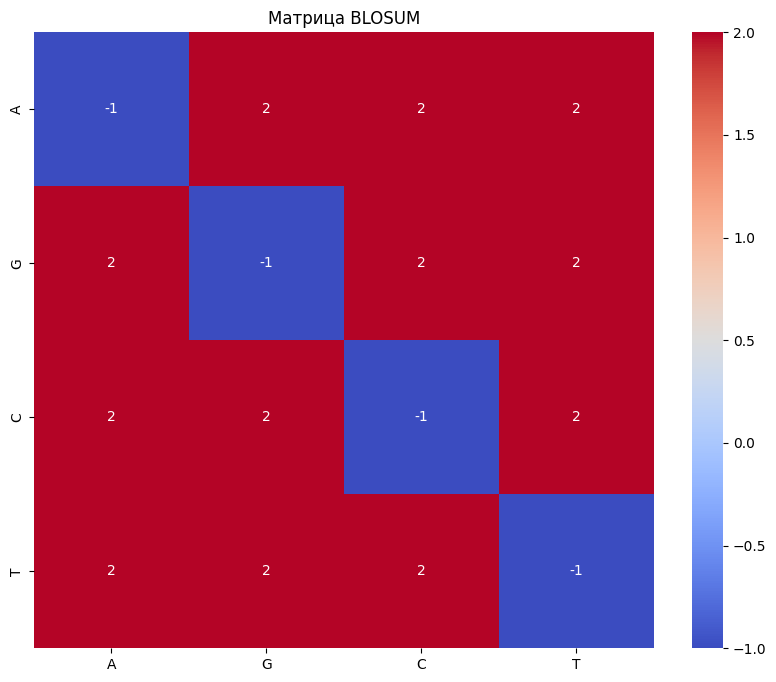

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_blosum_matrix(matrix, nucleotides):
    data = np.array([[matrix[x][y] for y in nucleotides] for x in nucleotides])
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, xticklabels=nucleotides, yticklabels=nucleotides, annot=True, cmap="coolwarm")
    plt.title("Матрица BLOSUM")
    plt.show()

# Пример использования
visualize_blosum_matrix(matrix, nucleotides)

# Реализация алгоритма Нидлмана-Вунша

### Шаг 5: Инициализация матрицы динамического программирования

Теперь перейдём к реализации алгоритма [Нидлмана-Вунша](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm).

Реализуйте функцию `init`, которая по $m, n$ и ошибке $\sigma$ строит матрицу c $m + 1$ строкой и $n + 1$ столбцом:

$$A_{m,n} = \begin{pmatrix} 0 & -\sigma & \cdots & -n \sigma \\ -\sigma & 0 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ -m\sigma & 0 & \cdots & 0 \end{pmatrix} $$

**Пример:**

```python
print(init(3, 3, 4))
[[0, -4, -8, -12], [-4, 0, 0, 0], [-8, 0, 0, 0], [-12, 0, 0, 0]]
```

In [41]:
def init(rows, cols, gap_penalty=10):
    matrixs = []
    for n in range(rows + 1):
        rows_list = []
        for i in range(cols +1):
            if n == 0:
                rows_list.append(-i * gap_penalty)
            if n != 0:
                if i == 0:
                    rows_list.append(-n * gap_penalty)
                else:
                    rows_list.append(0)
        matrixs.append(rows_list)
        
    return matrixs

init(3,3,4)

[[0, -4, -8, -12], [-4, 0, 0, 0], [-8, 0, 0, 0], [-12, 0, 0, 0]]

### Шаг 6: Заполнение матрицы динамического программирования

Пусть `a` и `b` - две последовательности, которые хотим выравнять. Теперь имея пустую матрицу, нужно научиться её заполнять. Для этого вспомним, как вычисляется очередной элемент матрицы:

$$A_{i \ j} = max \begin{cases} A_{i-1 \ j-1} + s(a_{i},b_{j}) & \ \text{Match / Mismatch}\\ A_{i \ j-1} - \sigma & \ \text{Insertion} \\ A_{i-1\ j} - \sigma & \ \text{Deletion} \end{cases}$$

где $s(a_{i},b_{j})$ - значение матрицы BLOSUM для нуклеотидов $a_{i}$ и $b_{j}$, $\sigma$ - штраф за пропуск символа в выравнивании (параметр)

### Шаг 7: Вычисление значения матрицы

Реализуйте функцию `get_new_score`, которая принимает на вход 5 параметров - `up` ($A_{i-1\ j}$), `left` ($A_{i \ j-1}$), `middle` ($A_{i-1 \ j-1}$), `s_score` ($s(a_{i},b_{j})$), `gap_penalty` ($\sigma$), и вычисляет значение для матрицы $A_{i\ j}$

**Пример:**

```python
print(get_new_score(0, 10, 2, 0, 2))
8
print(get_new_score(-16, -7, -14, 0, 2))
-9
```

In [42]:
def get_new_score(up, left, middle, s_score, gap_penalty):
    return max(up - gap_penalty, left - gap_penalty, middle + s_score)
get_new_score(0, 10, 2, 0, 2)

8

### Шаг 8 Заполнение матрицы

Реализуйте функцию `align`,  которая на вход принимает две последовательности ДНК, штраф за пропуск ($\sigma$), матрицу BLOSUM и возвращает заполненную матрицу `A`.

**Пример:**

```python
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2

print(align(top_seq, bottom_seq, gap_penalty, blosum_matrix))
[[0, -2, -4, -6, -8, -10, -12, -14, -16],
 [-2, -1, -2, 2, 0, -2, -4, -6, -8],
 [-4, 2, 0, 0, 6, 4, 2, 0, -2],
 [-6, 0, 2, 6, 4, 4, 4, 2, 0],
 [-8, -2, 4, 4, 7, 5, 8, 6, 4],
 [-10, -4, 2, 2, 5, 9, 7, 10, 8]]
```

In [43]:
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2

In [44]:
def align(top_seq, bottom_seq, gap_penalty, blosum_matrix):
    rows = len(top_seq)
    cols = len(bottom_seq)
    matrix = init(rows, cols, gap_penalty)

    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            s_score = blosum_matrix[top_seq[i - 1]][bottom_seq[j - 1]]
            up = matrix[i - 1][j]  
            left = matrix[i][j - 1]  
            middle = matrix[i - 1][j - 1]  
            matrix[i][j] = get_new_score(up, left, middle, s_score, gap_penalty)
    
    return matrix

blosum_matrix = create_blosum_matrix(scores, nucleotides)  
align(top_seq, bottom_seq, gap_penalty, blosum_matrix)

[[0, -2, -4, -6, -8, -10],
 [-2, 2, 0, -2, -4, -6],
 [-4, 0, 4, 2, 0, -2],
 [-6, -2, 2, 3, 4, 2],
 [-8, -4, 0, 4, 5, 6],
 [-10, -6, -2, 2, 6, 4],
 [-12, -8, -4, 0, 4, 8],
 [-14, -10, -6, -2, 2, 6],
 [-16, -12, -8, -4, 0, 4]]

### Шаг 9: Построение выравнивания

Теперь имея матрицу выравнивания построим самое выравнивание.

Реализуйте функцию get_alignment, которая по двум последовательностям, матрице выравнивания, штрафа за пропуски, бонусам за совпадение/несовпадение нуклеотидов строит выравнивание.

**Пример:**

```python

top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])
--TATGC-
AGTACGCA

top_seq = "AGTCTCCCCC"
bottom_seq = "ACTTCTACCCCAGC"
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])
ACTTCTACCCCAGC
AGT-CT-CCCC--C
```

In [46]:
def get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix):
    aligned_top = []
    aligned_bottom = []
    i = len(top_seq)
    j = len(bottom_seq)
    
    while i > 0 or j > 0:
        current_score = sm[i][j]
        if i > 0 and j > 0 and current_score == sm[i-1][j-1] + blosum_matrix[top_seq[i-1]][bottom_seq[j-1]]:
            aligned_top.append(top_seq[i-1])
            aligned_bottom.append(bottom_seq[j-1])
            i -= 1
            j -= 1
        elif i > 0 and current_score == sm[i-1][j] - gap_penalty:
            aligned_top.append(top_seq[i-1])
            aligned_bottom.append('-')
            i -= 1
        else:
            aligned_top.append('-')
            aligned_bottom.append(bottom_seq[j-1])
            j -= 1

    aligned_top = ''.join(reversed(aligned_top))
    aligned_bottom = ''.join(reversed(aligned_bottom))
    
    return aligned_top, aligned_bottom

top_seq = "AGTCTCCCCC"
bottom_seq = "ACTTCTACCCCAGC"
gap_penalty = 2
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])

--AGT-C-TCCCCC
ACTTCTACCCCAGC


## Поздравляю! Мы научились выравнивать ДНК!